###[Menggunakan Model untuk Melakukan Prediksi](https://www.dicoding.com/academies/185/tutorials/10019?from=10014)

In [ ]:
#import library
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
#input dataset
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [ ]:
#make a simple neural network model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
#compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(xs, ys, epochs=150)

In [ ]:
#model prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 91ms/step
[[23.305214]]


In [ ]:
#model prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 91ms/step
[[23.305214]]


###[Model Sekuensial dengan Beberapa Layer](https://www.dicoding.com/academies/185/tutorials/10024?from=10019)

In [ ]:
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=8),
                             keras.layers.Dense(units=1)])

In [ ]:
#compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(xs, ys, epochs=150)

In [ ]:
#model prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 79ms/step
[[24.801735]]


###[Menggunakan Model untuk Klasifikasi Dua Kelas](https://www.dicoding.com/academies/185/tutorials/10029?from=10024)

In [ ]:
import pandas as pd
df = pd.read_csv('citrus.csv')
df.info()
df.head(10000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1
df.head(10000)

<ipython-input-19-3da8e5faf634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'orange'] = 0
<ipython-input-19-3da8e5faf634>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'grapefruit'] = 1


,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


In [ ]:
dataset = df.values

In [ ]:
# pilih 5 kolom terakhir sebagai atribut
X = dataset[:,1:6]
# bilangan sebelum koma untuk memilih baris pada dataframe
# bilangan setelah koma untuk memilih kolom pada dataframe

In [ ]:
y = dataset[:,0]

In [ ]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [ ]:
# pisahkan data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
import numpy as np

Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
                    Dense(32, activation='relu', input_shape=(5,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100)

In [ ]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

94/94 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.9307


[0.1689242571592331, 0.9306666851043701]

### Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('Iris.csv')
df.info()
df.head(150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = df.drop(columns='Id')

In [ ]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=100)
model.evaluate(X_test, Y_test)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 1.0649 - accuracy: 0.6762
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0258 - accuracy: 0.6857
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9910 - accuracy: 0.6857
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9598 - accuracy: 0.6857
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9289 - accuracy: 0.6857
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8967 - accuracy: 0.6857
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8648 - accuracy: 0.6857
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8340 - accuracy: 0.6857
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7972 - accuracy: 0.6857
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7615 - accuracy: 0.6857
Epoch 11/100
4/4 [=========

[0.06595203280448914, 0.9777777791023254]

###Plot Loss dan Akurasi dari Trained Model

In [ ]:
import matplotlib.pyplot as plt

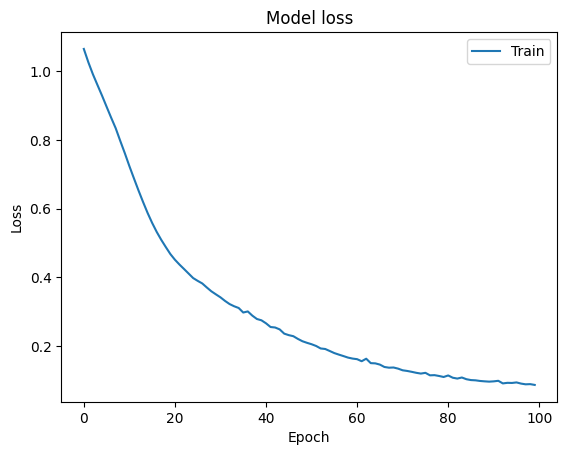

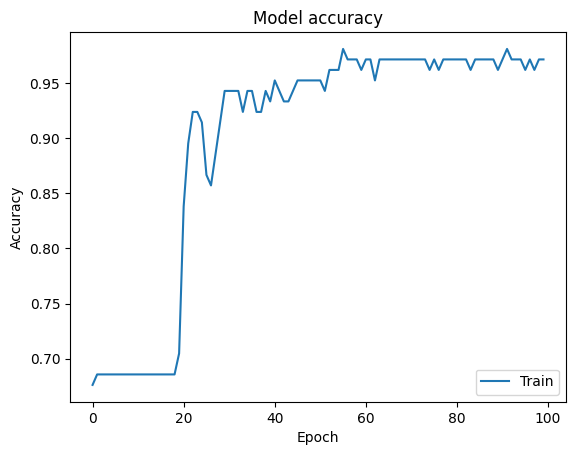

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()



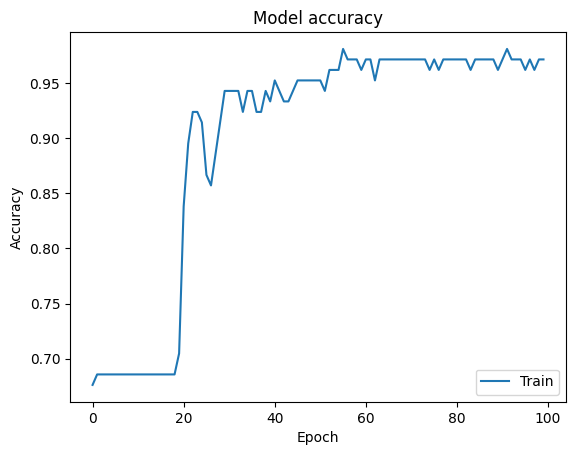

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

###Penggunaan Callbacks

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 2s 5ms/step - loss: 1.0807 - accuracy: 0.2952
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0528 - accuracy: 0.3143
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0274 - accuracy: 0.5333
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0039 - accuracy: 0.6381
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9773 - accuracy: 0.6476
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9493 - accuracy: 0.6476
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9186 - accuracy: 0.6476
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8857 - accuracy: 0.6762
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8511 - accuracy: 0.6762
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8145 - accuracy: 0.6476
Epoch 11/50
4/4 [======================

###Menggunakan Dataset dari tf.data.datasets

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


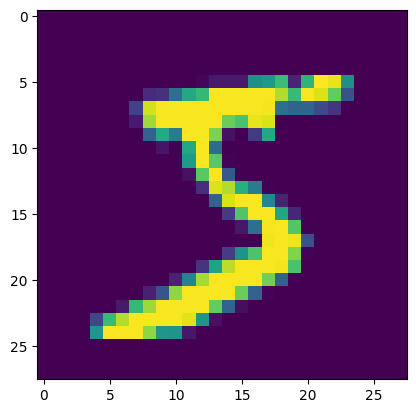

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [ ]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2579 - accuracy: 0.9262
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1144 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0582 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0461 - accuracy: 0.9854


### Penggunaan Batch Loading

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#batch size 32
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 7ms/step - loss: 0.2573 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1112 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0755 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9863


In [ ]:
#batch size 128
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0226 - accuracy: 0.9940
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 0.9961
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0160 - accuracy: 0.9969
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0143 - accuracy: 0.9971
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0125 - accuracy: 0.9978
